importing the necessary libraries

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.tri as tri


top defensive players with most ball recoveries

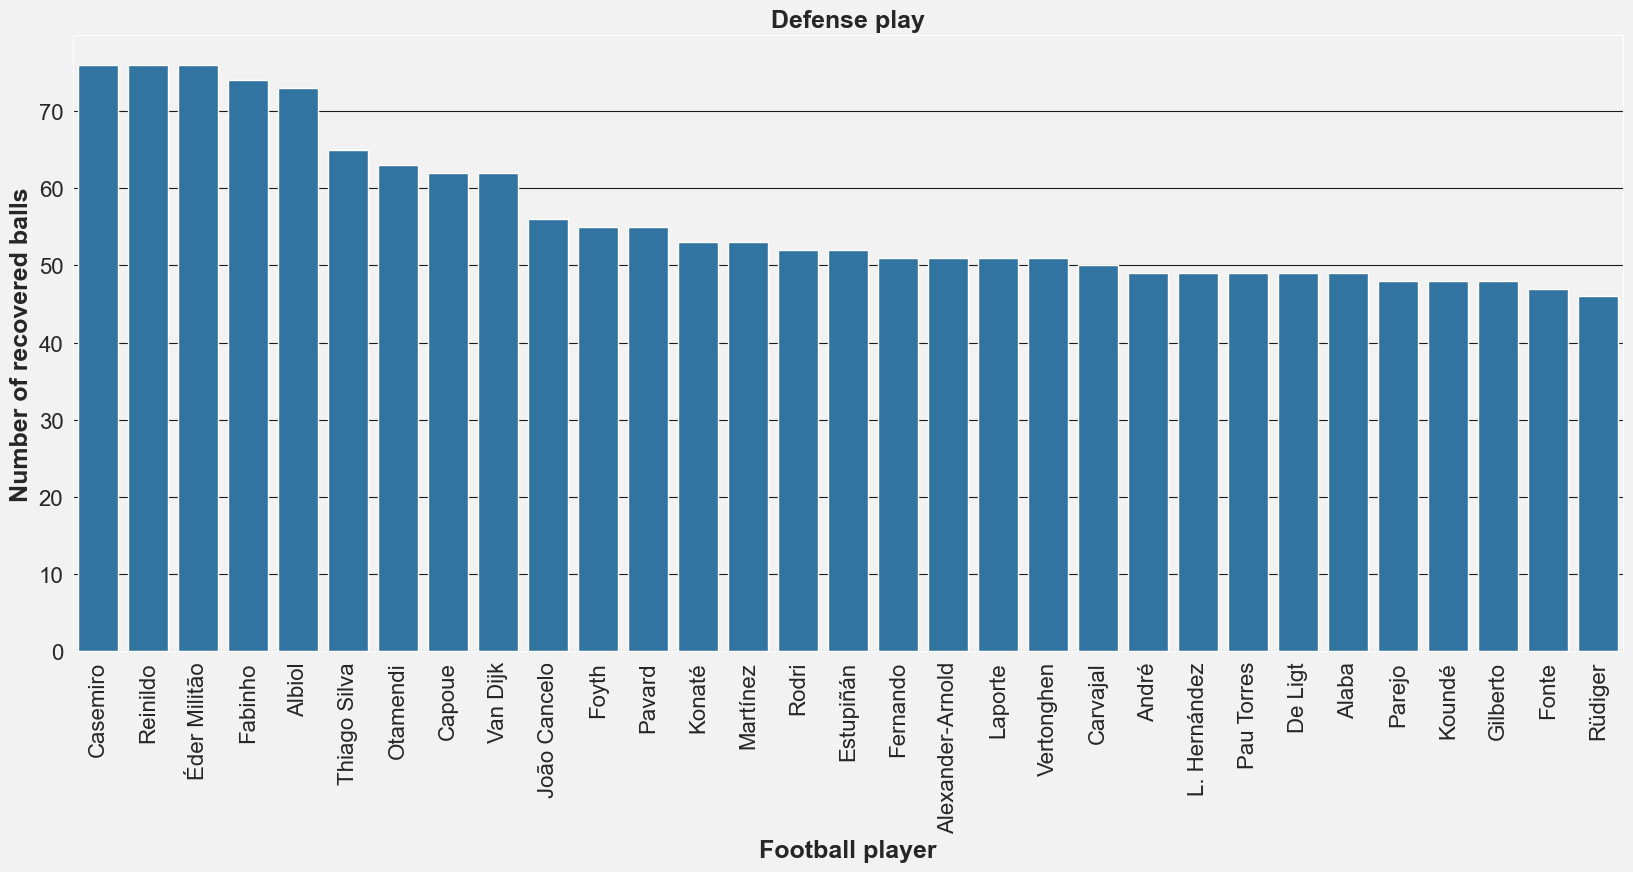

In [18]:
defendingDF = pd.read_csv('archive/defending.csv')

plt.figure(figsize=(20, 8))
plt.title('Defense play', fontsize=18, fontweight='bold')
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})
sns.barplot(x=defendingDF.sort_values('balls_recoverd', ascending=False)[0:31]['player_name'],
            y=defendingDF.sort_values('balls_recoverd', ascending=False)[0:31]['balls_recoverd'])
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of recovered balls', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.show()

most tackles vs tackles won bar plot

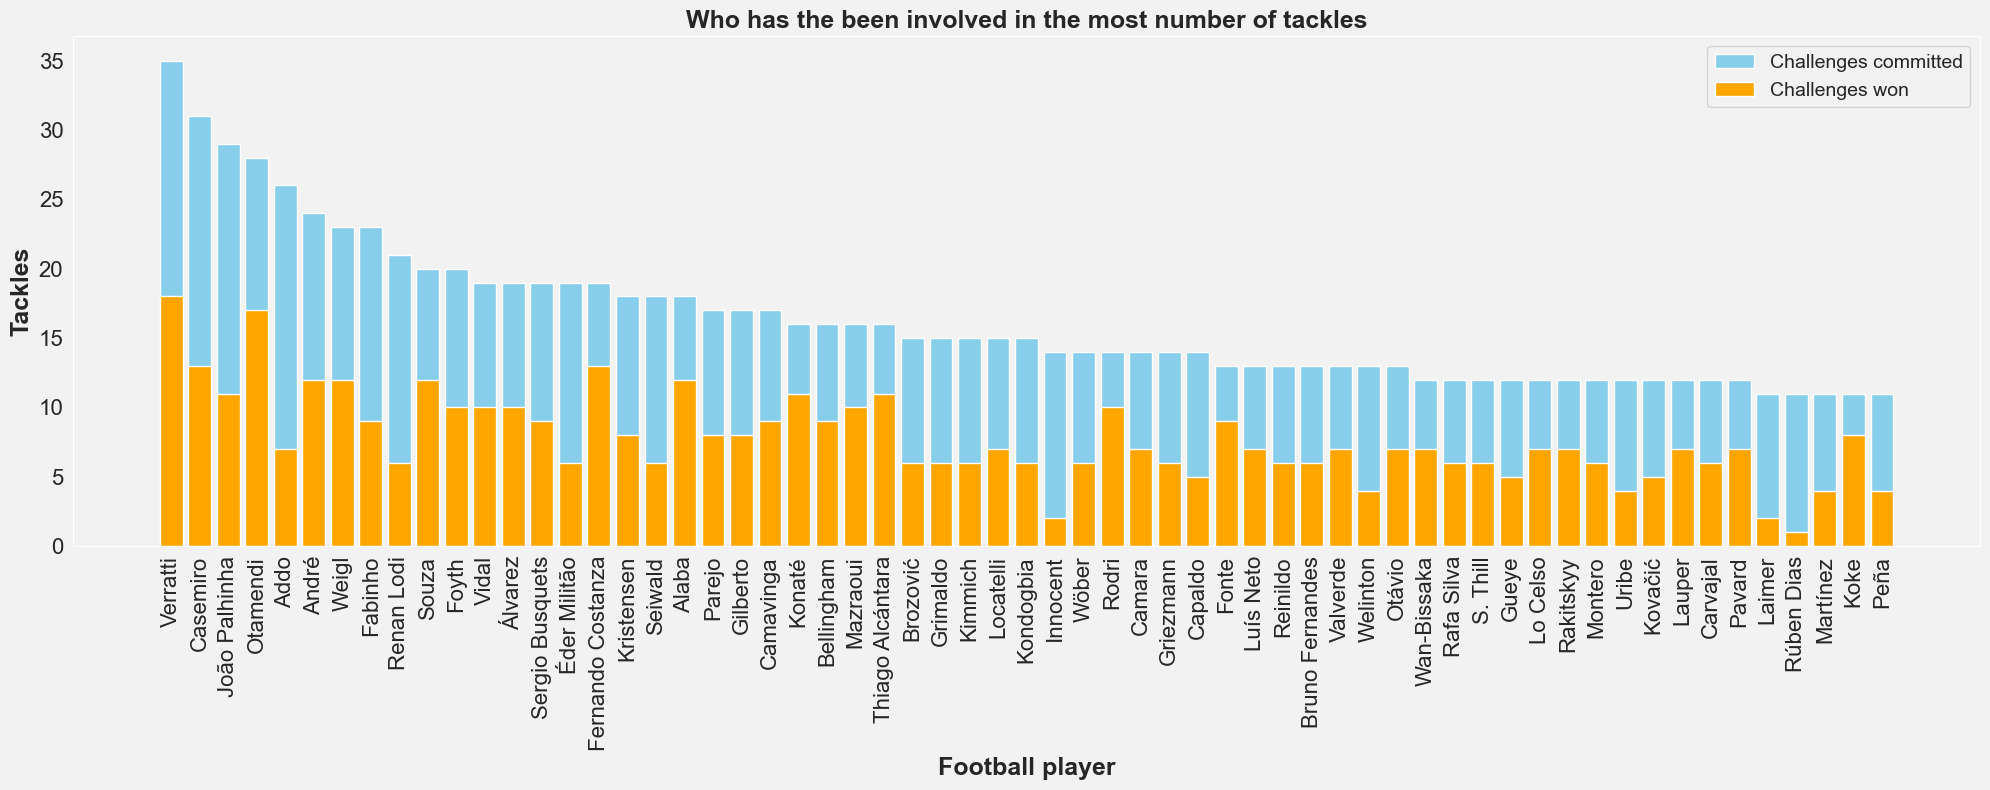

In [19]:
# Sample data (assuming 'distribution_df' is already defined)
players = defendingDF.sort_values(by='tackles', ascending=False)[0:61]['player_name']
tackles = defendingDF.sort_values(by='tackles', ascending=False)[0:61]['tackles']
tacklesLost = defendingDF.sort_values(by='tackles', ascending=False)[0:61]['t_won']



# Plotting the bars
plt.figure(figsize=(20, 8))
plt.bar(players, tackles, color='skyblue', label='Challenges committed')
plt.bar(players, tacklesLost, color='orange', label='Challenges won')

# Adding title and labels
plt.title('Who has the been involved in the most number of tackles', fontsize=18, fontweight='bold')
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Tackles', fontsize=18, fontweight='bold')

# Adjusting tick labels
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)

# Add legend
plt.legend(fontsize=14)

# Remove grid
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


inputting two players

In [20]:
playerName = str(input())
playerName2 = str(input())

defensive pie plot tackles won vs tackles lost vs clearances

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11


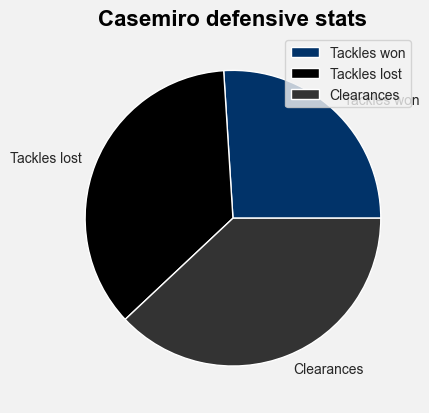

In [21]:
# extracting a row for the given player based on the player name entered
player_row1 = defendingDF[defendingDF['player_name'] == playerName]

#extracting the three statistics in order to plot the pie graph
playerTacklesWon = defendingDF['t_won'].iloc[0]
playerTacklesLost = defendingDF['t_lost'].iloc[0]
clearances = defendingDF['clearance_attempted'].iloc[0]


plt.title(playerName+" defensive stats", fontdict={'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})
plt.pie([playerTacklesWon, playerTacklesLost, clearances],labels=['Tackles won', 'Tackles lost', 'Clearances'], colors=['#013369','#000000','#333333'])
plt.legend()

player_row1

tackles attempted vs tackles won with mean and 90th percentiles line

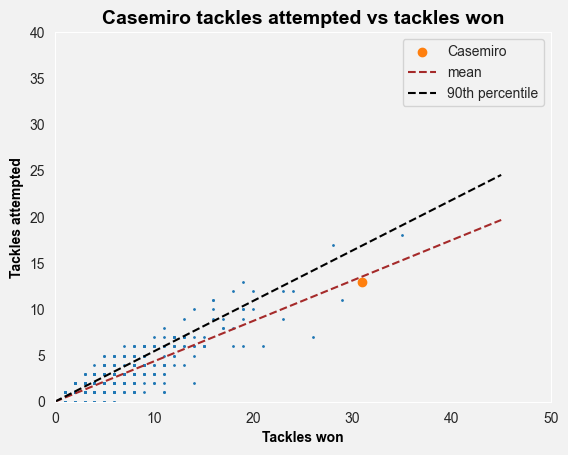

In [22]:

# x and y limits based on the given dataset
plt.ylim(0,40)
plt.xlim(0,50)


# x and y labels
plt.xlabel("Tackles won", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel("Tackles attempted", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})

# merging minutes played and attempts from two different datasets

# scatter plot 1 for every player in the league
plt.scatter(defendingDF['tackles'], defendingDF['t_won'],s=1)
tackles = defendingDF['tackles'].iloc[0]
tacklesWon = defendingDF['t_won'].iloc[0]

# scatter plot 2 for given searched player
plt.scatter(player_row1['tackles'], player_row1['t_won'], label=playerName)
plt.title(playerName+" tackles attempted vs tackles won", fontdict={'fontname': 'Arial', 'fontsize': 14, 'fontweight': 'bold', 'color': 'black'})




# Mean line
average_y = np.mean(defendingDF['t_won'])
average_x = np.mean(defendingDF['tackles'])
slope=(average_y)/(average_x)
x_values = np.linspace(0, 45, 50) 
y_values = slope*(x_values)
plt.plot(x_values, y_values, color='brown',linestyle='--',label='mean')


# 90th percentile line
percentile90_y =np.percentile(defendingDF['t_won'], 90)
percentile90_x =np.percentile(defendingDF['tackles'], 90)
slope90 = percentile90_y/percentile90_x
x_values90 = np.linspace(0, 45, 50) 
y_values90 = slope90*(x_values90)
plt.plot(x_values90, y_values90, color='black',linestyle='--',label='90th percentile')

plt.legend()

plt.grid(False)


seperating the players above the 90th percentile

           player_name  tackles  t_won
0             Casemiro       31     13
3              Fabinho       23      9
6             Otamendi       28     17
10               Foyth       20     10
11              Pavard       12      7
12              Konaté       16     11
14               Rodri       14     10
21               André       24     12
22               Alaba       18     12
26            Gilberto       17      8
27              Parejo       17      8
29               Fonte       13      9
36              Lauper       12      7
41              Camara       14      7
48               Souza       20     12
49    Thiago Alcántara       16     11
50            Mazraoui       16     10
53   Fernando Costanza       19     13
69       João Palhinha       29     11
70          Kristensen       18      8
75               Weigl       23     12
94           Rakitskyy       12      7
109              Vidal       19     10
120            Álvarez       19     10
121    Sergio Busquets   

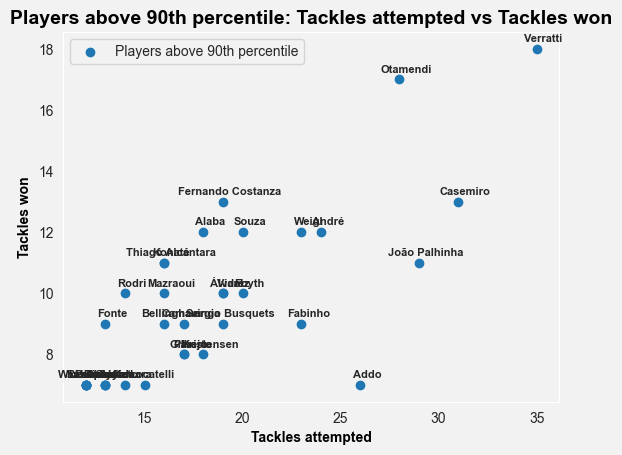

In [23]:
# Filter players above the 90th percentile line
players_above_90th = defendingDF[(defendingDF['tackles'] > percentile90_x) & (defendingDF['t_won'] > percentile90_y)]

# Display their information in a DataFrame
players_df = players_above_90th[['player_name', 'tackles', 't_won']]
print(players_df)

# Plot their stats separately and annotate their names
plt.figure()
plt.scatter(players_above_90th['tackles'], players_above_90th['t_won'], label='Players above 90th percentile')
plt.xlabel("Tackles attempted", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel("Tackles won", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
plt.title("Players above 90th percentile: Tackles attempted vs Tackles won", fontdict={'fontname': 'Arial', 'fontsize': 14, 'fontweight': 'bold', 'color': 'black'})
plt.legend()

# Annotate player names
for index, player in players_above_90th.iterrows():
    plt.annotate(player['player_name'], (player['tackles'], player['t_won']), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8, fontweight='bold')

plt.grid(False)

plt.show()

stats for player 1

In [25]:
import pandas as pd

# Read key stats data from CSV file
key_stats_df = pd.read_csv('archive/key_stats.csv')

# Merge key stats data with defending data based on player name
playerGraphDataDF = pd.merge(key_stats_df[['player_name', 'distance_covered', 'match_played']],
                             defendingDF[['player_name', 'balls_recoverd', 'tackles', 't_won', 'clearance_attempted']],
                             on='player_name')

# Replace '-' with 0.0 in the distance_covered column
playerGraphDataDF['distance_covered'] = playerGraphDataDF['distance_covered'].replace('-', 0.0)

# Extract row for the specified player
player_row1 = playerGraphDataDF[playerGraphDataDF['player_name'] == playerName].iloc[0]

# Convert distance_covered column to float after removing commas
playerGraphDataDF['distance_covered'] = playerGraphDataDF['distance_covered'].str.replace(',', '').astype(float)

# Calculate the proportion of each stat per match played
mp = int(player_row1['match_played'])
playerGraphStats = [float(player_row1['distance_covered']) / 15, 
                    float(player_row1['balls_recoverd']) / 10, 
                    player_row1['tackles'] / 4, 
                    player_row1['t_won'] / 3, 
                    player_row1['clearance_attempted'] / 3]

# Normalize the stats based on matches played
playerGraphStats = [x / mp for x in playerGraphStats]

# Display the normalized stats
playerGraphStats


[0.6521212121212121,
 0.6909090909090909,
 0.7045454545454546,
 0.3939393939393939,
 0.5757575757575757]

stats for player 2

In [26]:
import pandas as pd

# Read key stats data from CSV file
key_stats_df = pd.read_csv('archive/key_stats.csv')

# Merge key stats data with defending data based on player name
playerGraphDataDF2 = pd.merge(key_stats_df[['player_name', 'distance_covered', 'match_played']],
                              defendingDF[['player_name', 'balls_recoverd', 'tackles', 't_won', 'clearance_attempted']],
                              on='player_name')

# the datasent had hyphens (-) in the places where no data was available so we replace those values with a 0.0 floating point value by the following line of code

# Replace '-' with 0.0 in the distance_covered column
playerGraphDataDF2['distance_covered'] = playerGraphDataDF2['distance_covered'].replace('-', 0.0)

# Extract row for the specified player 2
player_row2 = playerGraphDataDF2[playerGraphDataDF2['player_name'] == playerName2].iloc[0]

# Convert distance_covered column to float after removing commas
playerGraphDataDF2['distance_covered'] = playerGraphDataDF2['distance_covered'].str.replace(',', '').astype(float)

# Calculate the proportion of each stat per match played
mp2 = int(player_row2['match_played'])
playerGraphStats2 = [float(player_row2['distance_covered']) / 15, 
                     float(player_row2['balls_recoverd']) / 10, 
                     player_row2['tackles'] / 4, 
                     player_row2['t_won'] / 3, 
                     player_row2['clearance_attempted'] / 3]

# Normalize the stats based on matches played
playerGraphStats2 = [x / mp2 for x in playerGraphStats2]

# Display the normalized stats
playerGraphStats2


[0.764, 0.52, 0.35, 0.33333333333333337, 0.16666666666666669]

plotting a pentagonal radar chart for player 1

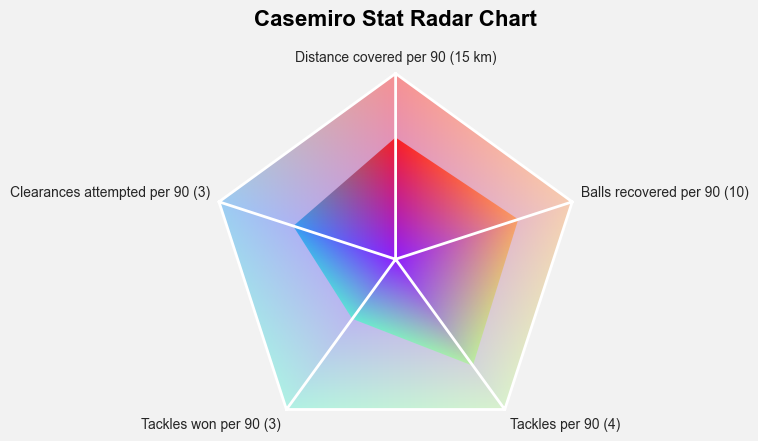

In [27]:

# Define the proportions and labels for the radar chart
proportions = playerGraphStats  # The normalized statistics for the player
labels = ['Distance covered per 90 (15 km)', 'Balls recovered per 90 (10)', 'Tackles per 90 (4)', 
          'Tackles won per 90 (3)', 'Clearances attempted per 90 (3)']

# Number of vertices in the radar chart
N = len(proportions)

# Extend the proportions array to close the radar chart
proportions = np.append(proportions, 1)

# Generate angles for each vertex of the radar chart
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)

# Calculate the x and y coordinates of the vertices
x = np.append(np.sin(theta), 0)  # x-coordinate
y = np.append(np.cos(theta), 0)  # y-coordinate

# Define the triangles to create the background and foreground of the radar chart
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)  # Background triangles
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)  # Foreground triangles

# Define the colormap and colors for the radar chart
cmap = plt.cm.rainbow_r  # Choose a colormap
colors = np.linspace(0, 1, N + 1)  # Define colors for vertices

# Plot the background and foreground triangles
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)

# Plot the outline of the radar chart
plt.triplot(triang_backgr, color='white', lw=2)

# Add labels to each vertex of the radar chart
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,  
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')

# Turn off the axes and set the aspect ratio to equal
plt.axis('off')
plt.gca().set_aspect('equal')

# Add a title to the radar chart
plt.title(playerName + ' Stat Radar Chart\n', fontdict={'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Show the radar chart
plt.show()

radar chart player 1 vs player 2

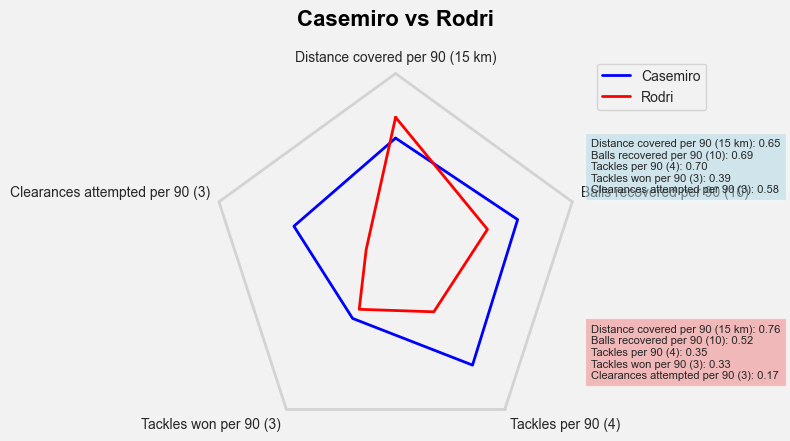

In [28]:
proportions1 = playerGraphStats
proportions2 = playerGraphStats2

labels = ['Distance covered per 90 (15 km)', 'Balls recovered per 90 (10)', 'Tackles per 90 (4)', 
          'Tackles won per 90 (3)', 'Clearances attempted per 90 (3)']

# Define player statistics as strings
stats1 = [f'{label}: {value:.2f}' for label, value in zip(labels, proportions1)]
stats2 = [f'{label}: {value:.2f}' for label, value in zip(labels, proportions2)]

# Join the statistics into a single string with line breaks
stats_str1 = '\n'.join(stats1)
stats_str2 = '\n'.join(stats2)

N = len(labels)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.sin(theta)
y = np.cos(theta)

# Append the first vertex to the end to close the polygon
x = np.append(x, x[0])
y = np.append(y, y[0])

# Plotting the filled background pentagon with 5 equilateral triangles
for i in range(N):
    plt.plot([x[i], x[(i+1)%N]], [y[i], y[(i+1)%N]], color='lightgray', lw=2)

# Plotting the first player's statistics
plt.plot(x * np.append(proportions1, proportions1[0]), y * np.append(proportions1, proportions1[0]), color='blue', lw=2, label=playerName)

# Plotting the second player's statistics
plt.plot(x * np.append(proportions2, proportions2[0]), y * np.append(proportions2, proportions2[0]), color='red', lw=2, label=playerName2)

# Adding labels to the vertices
for label, xi, yi in zip(labels, x[:-1], y[:-1]):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')

# Adding legend and placing it on the extreme right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Setting plot properties
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(playerName +' vs '+playerName2+'\n', fontdict={'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Adding a text box with player statistics
plt.text(1.05, 0.5, stats_str1, bbox=dict(facecolor='lightblue', alpha=0.5), fontsize=8, verticalalignment='center')
plt.text(1.05, -0.5, stats_str2, bbox=dict(facecolor='lightcoral', alpha=0.5), fontsize=8, verticalalignment='center')

plt.show()

goalkeeping graphs for goals conceded vs shots saved

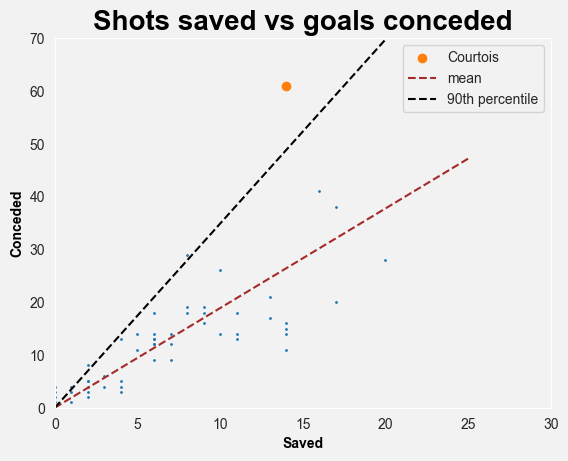

In [29]:
goalKeepingDF = pd.read_csv('archive/goalkeeping.csv')

keeper = str(input())
# x and y limits based on the given dataset
plt.ylim(0,70)
plt.xlim(0,30)


# x and y labels
plt.xlabel("Saved", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel("Conceded", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})


# scatter plot 1 for every player in the league
plt.scatter(goalKeepingDF['conceded'], goalKeepingDF['saved'],s=1)


# scatter plot 2 for given searched player
keeper_row = goalKeepingDF[goalKeepingDF['player_name'] == keeper]
plt.scatter(keeper_row['conceded'], keeper_row['saved'], label=keeper)


# Mean line
average_y = np.mean(goalKeepingDF['saved'])
average_x = np.mean(goalKeepingDF['conceded'])
slope=average_y/average_x
x_values = np.linspace(0, 25, 50) 
y_values = slope*(x_values)
plt.plot(x_values, y_values, color='brown',linestyle='--',label='mean')



percentile90_y = np.percentile(goalKeepingDF['saved'], 90)
percentile90_x = np.percentile(goalKeepingDF['conceded'], 90)

# Calculate slope using 90th percentile values
slope90 = percentile90_y/average_x  
x_values90 = np.linspace(0, 25, 50) 
y_values90 = slope90 * (x_values90)

# Plot the 90th percentile line
plt.plot(x_values90, y_values90, color='black', linestyle='--', label='90th percentile')
plt.legend()
plt.title('Shots saved vs goals conceded', fontdict={'fontname': 'Arial', 'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})

plt.grid(False)


extracting the top 90 percentile of keepers

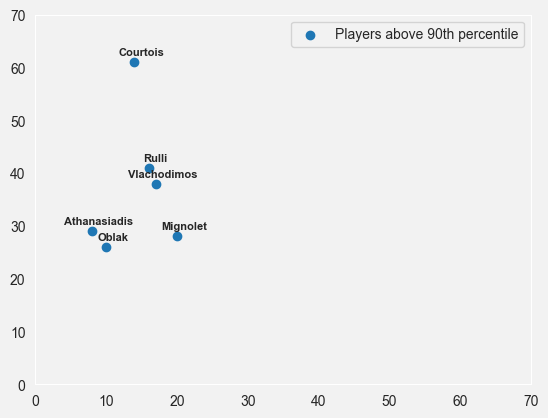

   serial   player_name         club    position  saved  conceded  \
0       1      Courtois  Real Madrid  Goalkeeper     61        14   
1       2         Rulli   Villarreal  Goalkeeper     41        16   
2       3   Vlachodimos      Benfica  Goalkeeper     38        17   
3       4  Athanasiadis      Sheriff  Goalkeeper     29         8   
4       5      Mignolet  Club Brugge  Goalkeeper     28        20   
5       6         Oblak     Atlético  Goalkeeper     26        10   

   saved_penalties  cleansheets  punches made  match_played  
0                1            5             4            13  
1                0            3            12            12  
2                1            5             5            10  
3                0            1             2             5  
4                0            0             1             6  
5                0            3             2            10  


In [30]:
# Calculate 90th percentile values
percentile90_saved = np.percentile(goalKeepingDF['saved'], 90)
percentile90_conceded = np.percentile(goalKeepingDF['conceded'], 90)

# Filter players above the 90th percentile line
players_above_90th = goalKeepingDF[(goalKeepingDF['saved'] > percentile90_saved)]


plt.ylim(0,70)
plt.xlim(0,70)

# Plot players above the 90th percentile line
plt.scatter(players_above_90th['conceded'], players_above_90th['saved'], label='Players above 90th percentile')

# Annotate player names
for index, player in players_above_90th.iterrows():
    plt.annotate(player['player_name'], (player['conceded'], player['saved']), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8, fontweight='bold')

plt.legend()

plt.grid(False)
plt.show()

# Display stats of players above 90th percentile in a dataframe
print(players_above_90th)
